# Proyek Klasifikasi Kanker Payudara

Proyek ini bertujuan untuk menganalisis dan mengklasifikasikan data kanker payudara menggunakan beberapa algoritma machine learning. Dataset yang digunakan berasal dari UCI Machine Learning Repository: Breast Cancer Wisconsin (Diagnostic) Data Set dengan link : https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data . Tujuan utama dari proyek ini adalah untuk mengklasifikasikan tumor sebagai **Malignant (ganas)** atau **Benign (jinak)** berdasarkan beberapa fitur medis yang tersedia. Model yang digunakan meliputi beberapa algoritma, dan evaluasi dilakukan dengan akurasi serta laporan klasifikasi.

# Langkah 1: Setup Kaggle API

Pada tahap ini, kita perlu mengautentikasi dan mengonfigurasi Kaggle API untuk mengunduh dataset. Kita akan mengunggah file `kaggle.json`, yang berisi kredensial yang diperlukan untuk mengakses dataset dari Kaggle.

Setelah proses konfigurasi Kaggle API dan pengunggahan file kaggle.json selesai, kita berhasil mengautentikasi akses ke Kaggle dan siap untuk mengunduh dataset yang diperlukan. Hasil dari proses ini adalah tersedianya akses otomatis ke dataset yang relevan tanpa perlu mengunduhnya secara manual. Ini mempercepat alur kerja, memudahkan proses pembaruan data jika ada perubahan di Kaggle, dan memastikan bahwa data yang kita peroleh berasal dari sumber resmi dan terpercaya. Dengan demikian, kita bisa melanjutkan ke tahap berikutnya, seperti eksplorasi dan analisis data, dengan lebih efisien.

In [2]:
from google.colab import files

uploaded = files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

Saving kaggle.json to kaggle.json
kaggle.json


# Langkah 2: Mengunduh Dataset dari Kaggle

Setelah setup Kaggle API selesai, langkah berikutnya adalah mengunduh dataset "Breast Cancer Wisconsin (Diagnostic)" dari Kaggle dan mengekstraknya. Dataset ini akan digunakan untuk analisis dan pemodelan.

Setelah menjalankan proses pengunduhan dataset dari Kaggle, kita berhasil mendapatkan dataset **Breast Cancer Wisconsin (Diagnostic)** yang akan digunakan untuk analisis dan pemodelan. Proses ini memastikan bahwa data yang digunakan adalah versi terbaru dan sesuai dengan sumber yang resmi. Hasil dari pengunduhan ini adalah dataset yang siap diekstraksi dan dianalisis lebih lanjut. Dengan dataset yang tersedia secara lokal, kita bisa mulai melakukan tahap eksplorasi data untuk mendapatkan insight awal terkait distribusi, tren, dan karakteristik fitur yang akan digunakan dalam pemodelan machine learning.


In [3]:
# Mendownload dataset menggunakan Kaggle API
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

# Mengekstrak file zip yang telah diunduh
!unzip breast-cancer-wisconsin-data.zip

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 56.6MB/s]
Archive:  breast-cancer-wisconsin-data.zip
  inflating: data.csv                


# Langkah 3: Mengimpor Library yang Diperlukan

Pada langkah ini, kita mengimpor library yang diperlukan untuk analisis data, visualisasi, dan machine learning.
- **Pandas** digunakan untuk memanipulasi dan menganalisis data.
- **NumPy** digunakan untuk perhitungan numerik.
- **Seaborn dan Matplotlib** digunakan untuk visualisasi.
- **Scikit-learn** digunakan untuk pemodelan machine learning.
- **EllipticEnvelope** digunakan untuk mendeteksi dan menangani pencilan secara statistik.
- **SMOTE** digunakan untuk mengatasi masalah ketidakseimbangan kelas dalam dataset.

Setelah mengimpor library yang diperlukan, kita siap untuk memulai proses analisis, visualisasi, dan pemodelan machine learning. Library seperti **Pandas** dan **NumPy** akan membantu dalam manipulasi data serta perhitungan matematis yang efisien, sedangkan **Seaborn** dan **Matplotlib** memfasilitasi visualisasi data untuk memudahkan pemahaman pola dan distribusi. Library **Scikit-learn** akan menjadi fondasi dalam membangun model machine learning, sementara **EllipticEnvelope** membantu dalam mendeteksi dan menangani pencilan yang dapat mengganggu performa model. Terakhir, **SMOTE** memungkinkan penanganan ketidakseimbangan kelas dalam data, sehingga model dapat lebih efektif dalam mengenali kelas minoritas. Proses ini memastikan bahwa kita memiliki alat yang tepat untuk melanjutkan eksplorasi data dan membangun model yang akurat dan handal.


In [4]:
!pip install imblearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

# Langkah 4: Memuat dan Mengeksplorasi Data

Setelah dataset diunduh, kita akan memuat data ke dalam dataframe Pandas dan mengeksplorasi struktur dasar dataset, termasuk dimensi, tipe data, serta melihat beberapa baris pertama. Kita juga akan menghapus kolom yang tidak relevan seperti 'Unnamed: 32' dan 'id'.

Setelah memuat dataset ke dalam Pandas, kita dapat memahami struktur dan kualitas data secara lebih mendalam. Kita menemukan bahwa dataset berisi beberapa kolom yang tidak relevan untuk analisis, seperti 'Unnamed: 32' dan 'id', sehingga kolom-kolom ini dihapus untuk menghindari gangguan pada proses pemodelan. Dengan mengecek dimensi dan tipe data, kita dapat memastikan bahwa setiap fitur sudah dalam format yang sesuai untuk analisis lebih lanjut. Melihat beberapa baris pertama dari dataset juga membantu kita memahami pola awal data serta mendeteksi adanya anomali atau kesalahan. Langkah eksplorasi awal ini penting untuk mempersiapkan dataset yang bersih dan siap untuk tahap berikutnya, yaitu analisis lebih mendalam dan pemodelan machine learning.

In [7]:
# Memuat dataset
data_breast = pd.read_csv('data.csv')

# Cek dimensi dataset
print(f'Dimensi dataset: {data_breast.shape}')

# Menampilkan informasi dataset
data_breast.info()

# Menampilkan beberapa baris pertama
data_breast.head()

# Hapus kolom yang tidak diperlukan
data_breast = data_breast.drop(columns=['Unnamed: 32', 'id'], axis=1)

# Menampilkan informasi dataset setelah menghapus kolom yang tidak diperlukan
data_breast.info()

# Menampilkan statistik deskriptif dataset
print(data_breast.describe())

# Cek apakah ada missing value
print("\nApakah ada missing value?")
print(data_breast.isnull().sum())

# Cek apakah ada duplikat
print("\nJumlah data duplikat:")
print(data_breast.duplicated().sum())

# Hanya kolom numerik untuk perhitungan IQR
numerical_columns = data_breast.select_dtypes(include=['float64', 'int64'])

# Deteksi outlier menggunakan metode IQR (Interquartile Range)
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1

# Menghitung batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cek jumlah outlier
outliers = ((numerical_columns < lower_bound) | (numerical_columns > upper_bound)).sum()
print("\nJumlah outlier pada setiap fitur:")
print(outliers)

# Tampilkan deskripsi dataset setelah memeriksa kondisi data
print("\nStatistik deskriptif setelah memeriksa kondisi data:")
print(numerical_columns.describe())

Dimensi dataset: (569, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14 

Selanjutnya, pencilan akan dideteksi dan dihapus menggunakan **EllipticEnvelope**.
- **EllipticEnvelope** digunakan untuk mendeteksi pencilan berdasarkan asumsi distribusi Gaussian multivariat.
- Data dengan pencilan akan dihapus agar tidak mempengaruhi model yang akan dilatih.

Setelah menerapkan **EllipticEnvelope** untuk mendeteksi pencilan dalam dataset, kita dapat mengidentifikasi dan menghapus data yang berada jauh dari distribusi umum, berdasarkan asumsi distribusi Gaussian multivariat. Proses ini penting karena pencilan dapat memberikan dampak negatif pada model yang akan dilatih, seperti menurunkan akurasi dan membuat hasil prediksi menjadi tidak akurat. Dengan menghapus data yang terdeteksi sebagai pencilan, kita membersihkan dataset, sehingga meningkatkan kualitas data yang akan digunakan untuk pelatihan model. Setelah penghapusan, kita dapat memastikan bahwa model yang dibangun akan lebih robust dan lebih mampu generalisasi terhadap data baru, sehingga hasilnya menjadi lebih dapat diandalkan.

In [8]:
numerical_features = data_breast.select_dtypes(include=['float64', 'int64']).columns

# Menggunakan EllipticEnvelope untuk mendeteksi dan menangani pencilan
outlier_detector = EllipticEnvelope(contamination=0.01)

# Menghapus pencilan berdasarkan fitur numerik
for feature in numerical_features:
    feature_data = data_breast[[feature]].values
    mask = outlier_detector.fit_predict(feature_data)
    data_breast = data_breast[mask == 1]

print(f"Ukuran dataset setelah pencilan dihapus: {data_breast.shape}")

Ukuran dataset setelah pencilan dihapus: (406, 31)


# Langkah 5: Visualisasi Data (Distribusi Kelas dan Box Plot)
Pada langkah ini, kita memvisualisasikan distribusi target kelas 'diagnosis' serta distribusi fitur numerik dengan **box plot**.

- **Countplot** digunakan untuk memvisualisasikan distribusi target antara kategori Malignant dan Benign.
- **Boxplot** digunakan untuk memeriksa distribusi fitur numerik setelah pencilan dihapus.

Dengan menggunakan countplot, kita dapat melihat proporsi antara kategori Malignant (kanker ganas) dan Benign (kanker jinak) dalam data. Visualisasi ini menunjukkan ketidakseimbangan antara kedua kelas, yang penting untuk dipertimbangkan saat memilih teknik pemodelan dan evaluasi. Misalnya, jika salah satu kelas jauh lebih banyak daripada yang lain, ini dapat mempengaruhi hasil model, sehingga teknik seperti SMOTE mungkin diperlukan untuk menyeimbangkan data.

Selain itu, boxplot digunakan untuk memeriksa distribusi fitur numerik setelah penghapusan pencilan. Boxplot memberikan gambaran jelas mengenai rentang, median, dan variabilitas dari fitur-fitur tersebut. Dengan menganalisis boxplot, kita dapat mengidentifikasi apakah ada fitur yang memiliki distribusi yang sangat berbeda, serta melihat apakah ada nilai ekstrem yang mungkin perlu ditangani.

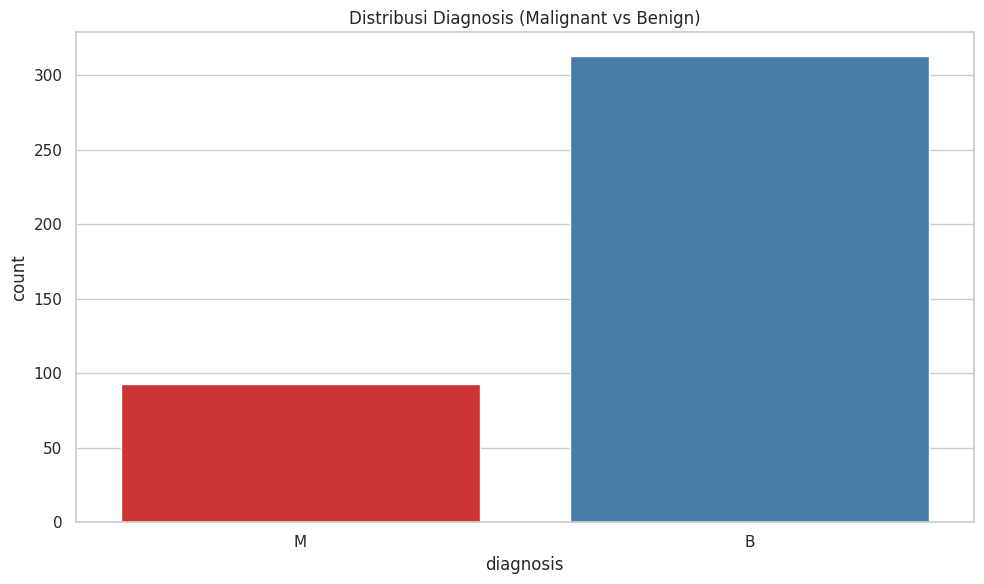

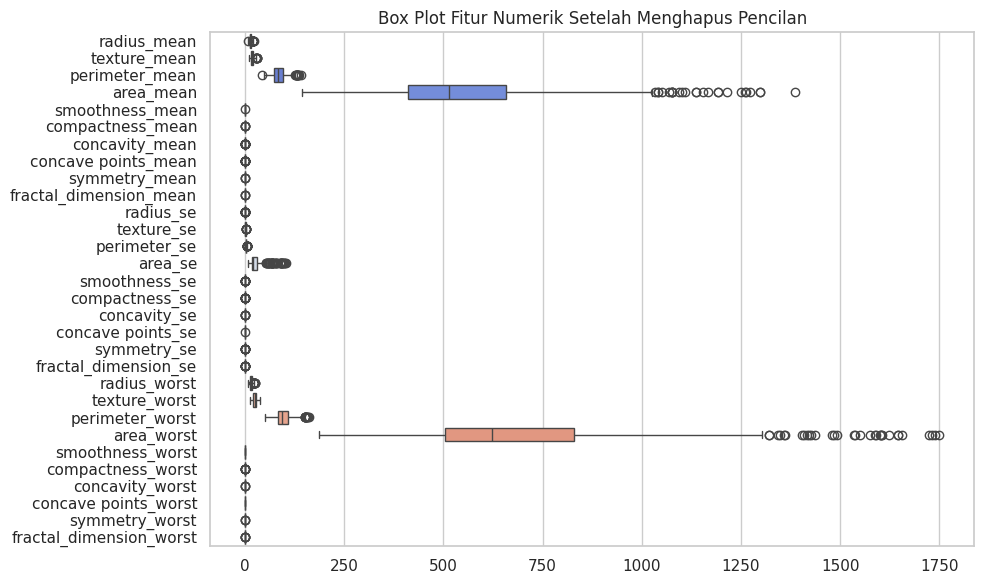

In [9]:
# Visualisasi distribusi diagnosis
plt.figure(figsize=(10, 6))
sns.countplot(x='diagnosis', data=data_breast, palette='Set1')
plt.title('Distribusi Diagnosis (Malignant vs Benign)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

# Visualisasi boxplot fitur numerik
sns.boxplot(data=data_breast[numerical_features], orient="h", palette="coolwarm")
plt.title('Box Plot Fitur Numerik Setelah Menghapus Pencilan')
plt.tight_layout()
plt.show()


# Langkah 6: Encoding Kolom Target dan Analisis Korelasi
Pada langkah ini, kita mengonversi kolom 'diagnosis' menjadi nilai numerik agar bisa digunakan dalam model machine learning.
- **M (Malignant)** dikonversi menjadi **1**, dan **B (Benign)** dikonversi menjadi **0**.
- **Matriks korelasi** divisualisasikan untuk melihat hubungan antar fitur dalam dataset.

Dengan mengonversi M (Malignant) menjadi 1 dan B (Benign) menjadi 0, kita memudahkan model untuk memahami dan memproses informasi tersebut. Proses ini sangat penting karena sebagian besar algoritma machine learning memerlukan input numerik, dan pengkodean ini memungkinkan kita untuk menggunakan algoritma tersebut secara efektif.

Selanjutnya, kita juga melakukan analisis korelasi untuk memahami hubungan antar fitur dalam dataset. Dengan menghitung matriks korelasi dan memvisualisasikannya, kita dapat mengidentifikasi fitur-fitur yang memiliki hubungan kuat dengan kolom target, serta hubungan antar fitur. Visualisasi ini memberikan informasi berharga, seperti fitur mana yang saling berkorelasi, sehingga kita dapat menghindari multikolinearitas yang dapat mempengaruhi model. Misalnya, jika dua fitur sangat berkorelasi, kita mungkin mempertimbangkan untuk menghapus salah satu dari keduanya untuk menyederhanakan model dan meningkatkan interpretabilitasnya.

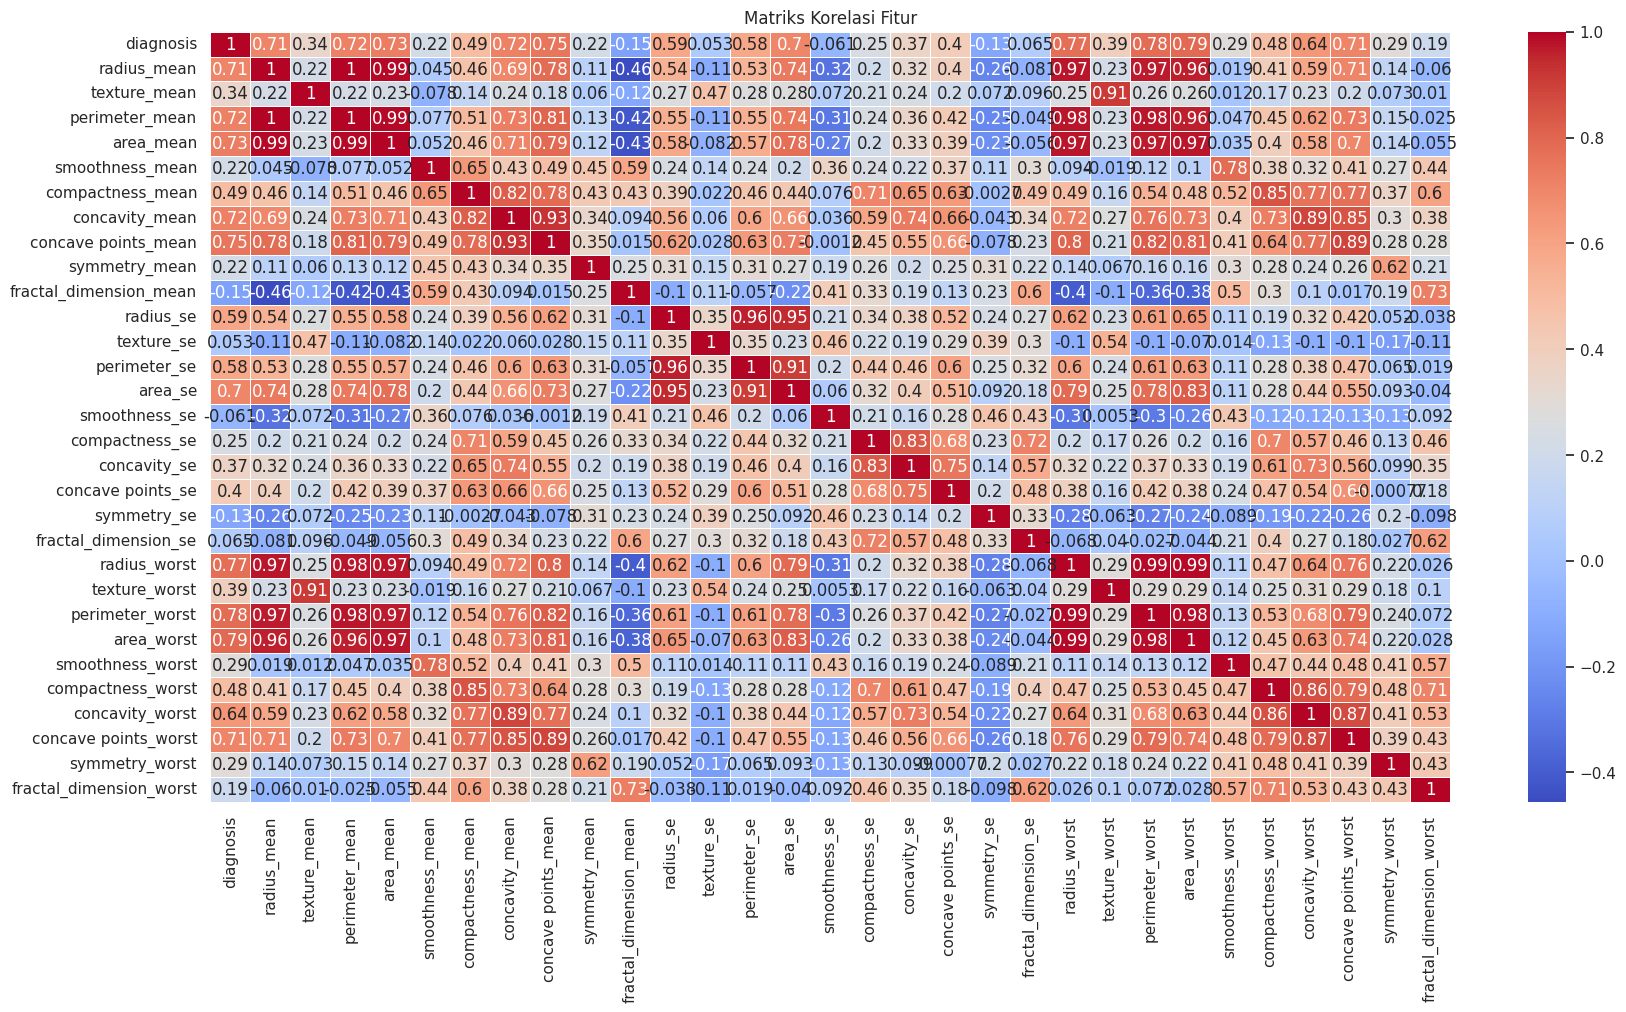

In [10]:
# Mengonversi kolom 'diagnosis' menjadi numerik (M -> 1, B -> 0)
data_breast['diagnosis'] = data_breast['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

# Matriks korelasi
plt.figure(figsize=(20, 10))
correlation_matrix = data_breast.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriks Korelasi Fitur")
plt.show()

# Langkah 7: Memisahkan Variabel Fitur dan Target
Pada langkah ini, kita melakukan pemisahan antara variabel fitur (X) dan variabel target (y) dari dataset yang telah kita siapkan. Variabel fitur terdiri dari semua kolom dalam dataset kecuali kolom 'diagnosis', yang berfungsi sebagai label klasifikasi untuk tugas yang akan dilakukan. Dengan memisahkan kedua variabel ini, kita dapat lebih mudah melakukan analisis dan mempersiapkan data untuk proses pelatihan model machine learning.

Proses pemisahan ini sangat penting karena model machine learning memerlukan input terpisah untuk fitur dan target agar dapat belajar dari data dengan benar. Dengan memiliki variabel fitur (X) sebagai input dan variabel target (y) sebagai output yang ingin diprediksi, kita dapat melanjutkan ke langkah selanjutnya, yaitu membagi dataset menjadi set pelatihan dan pengujian. Ini memastikan bahwa model yang kita bangun dapat dievaluasi secara akurat dan dapat melakukan generalisasi dengan baik pada data baru yang tidak terlihat sebelumnya. Selain itu, dengan mengorganisir data dalam format ini, kita juga memudahkan penerapan teknik preprocessing dan pemodelan selanjutnya.

In [11]:
X = data_breast.drop(['diagnosis'], axis=1)
y = data_breast['diagnosis']

# Langkah 8: Memeriksa Unique Class Labels di Target

Pada langkah ini, kita memeriksa kelas unik yang terdapat dalam variabel target (y) untuk memastikan bahwa dataset memiliki lebih dari satu kelas. Hal ini sangat penting karena dalam konteks klasifikasi, model machine learning memerlukan setidaknya dua kelas untuk dapat melakukan pembelajaran dan membuat prediksi yang bermakna.

Dengan memverifikasi kelas-kelas unik, kita dapat memastikan bahwa model akan dilatih untuk membedakan antara kategori yang berbeda, dalam hal ini antara tumor **Malignant** (1) dan **Benign** (0). Jika hanya ada satu kelas yang terdeteksi, model tidak akan memiliki dasar untuk belajar dan tidak akan dapat melakukan klasifikasi yang tepat.

Hasil dari pemeriksaan ini memberikan keyakinan bahwa dataset kita memiliki variasi yang cukup untuk melatih model dengan efektif, memungkinkan kita untuk melanjutkan ke langkah-langkah berikutnya dalam proses pemodelan. Jika terdapat ketidakseimbangan kelas atau hanya satu kelas yang terdeteksi, kita perlu mempertimbangkan strategi tambahan, seperti oversampling, undersampling, atau teknik lain untuk memastikan model dapat belajar dengan baik.

In [12]:
unique_classes = np.unique(y)
print(f"Unique class labels in y: {unique_classes}")

Unique class labels in y: [0 1]


# Langkah 9: Memeriksa Distribusi Kelas di y_train

Pada langkah ini setelah membagi dataset menjadi 70:30, kita memeriksa distribusi kelas di dalam variabel target data pelatihan (y_train) untuk mengevaluasi proporsi antara kelas **Malignant** dan **Benign**. Memastikan bahwa kita memiliki distribusi kelas yang seimbang sangat penting dalam konteks klasifikasi, karena ketidakseimbangan kelas dapat mempengaruhi performa model secara signifikan.

Jika satu kelas memiliki jumlah sampel yang jauh lebih banyak dibandingkan dengan kelas lainnya, model cenderung lebih memprediksi kelas mayoritas dan mengabaikan kelas minoritas. Hal ini dapat menyebabkan hasil yang tidak akurat, seperti rendahnya recall untuk kelas yang kurang terwakili.

Dengan memeriksa distribusi kelas, kita dapat mengetahui apakah kita perlu melakukan teknik penyeimbangan, seperti oversampling pada kelas minoritas atau undersampling pada kelas mayoritas, sebelum melanjutkan ke proses pelatihan model. Hasil dari pemeriksaan ini memberikan wawasan awal tentang kesiapan dataset untuk pelatihan dan membantu kita dalam merencanakan langkah-langkah selanjutnya dalam pengolahan data.

In [13]:
# Membagi dataset menjadi 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Distribusi kelas di y_train:")
print(y_train.value_counts())

Distribusi kelas di y_train:
diagnosis
0    225
1     59
Name: count, dtype: int64


# Langkah 10: Menggunakan SMOTE untuk Oversampling
Sebelum menerapkan SMOTE (Synthetic Minority Over-sampling Technique), kita memeriksa apakah ada lebih dari satu kelas dalam y_train. Jika ada, kita menggunakan SMOTE untuk menyeimbangkan kelas dengan membuat contoh sintetis dari kelas minoritas. Jika SMOTE diterapkan, kita akan melihat distribusi kelas di y_train_balanced untuk memastikan bahwa kelas sudah seimbang setelah proses oversampling.

Setelah menerapkan SMOTE, kelas minoritas (dalam hal ini, kelas Malignant) mendapatkan tambahan contoh sintetis yang membantu meningkatkan jumlah total sampel untuk kelas tersebut. Hasilnya, distribusi kelas dalam dataset pelatihan menjadi lebih seimbang.

In [14]:
# Memastikan ada lebih dari satu kelas
if len(np.unique(y_train)) > 1:
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

    # Melihat Distribusi Kelas Setelah Oversampling
    print("Distribusi kelas setelah SMOTE:")
    print(pd.Series(y_train_balanced).value_counts())
else:
    print("Hanya ada satu kelas di y_train, tidak ada SMOTE yang diterapkan.")

Distribusi kelas setelah SMOTE:
diagnosis
0    225
1    225
Name: count, dtype: int64


# Langkah 11: Normalisasi Data

Pada langkah ini, data fitur dinormalisasi menggunakan **StandardScaler** agar setiap fitur berada dalam skala yang sama. Ini penting untuk model seperti SVM dan KNN yang sensitif terhadap skala data.

Dengan menerapkan standardisasi, setiap fitur akan memiliki rata-rata 0 dan deviasi standar 1, sehingga mencegah fitur dengan rentang nilai yang lebih besar mendominasi pengaruh pada model. Proses ini meningkatkan stabilitas dan kinerja model, serta mempercepat konvergensi algoritma saat pelatihan.

Hasil dari langkah ini akan terlihat pada distribusi nilai fitur yang lebih terpusat dan lebih seragam, yang memungkinkan model untuk belajar dari data dengan lebih efisien. Dengan demikian, normalisasi data merupakan langkah krusial dalam mempersiapkan dataset untuk pelatihan model machine learning yang optimal.

In [15]:
# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Distribusi kelas di y_train:")
print(y_train.value_counts())
print("\nDistribusi kelas di y_test:")
print(y_test.value_counts())

Distribusi kelas di y_train:
diagnosis
0    225
1     59
Name: count, dtype: int64

Distribusi kelas di y_test:
diagnosis
0    88
1    34
Name: count, dtype: int64


# Langkah 12: Melatih Berbagai Model dan Memilih Model Terbaik
Pada langkah ini, berbagai model machine learning dilatih menggunakan set pelatihan yang telah dinormalisasi. Model yang digunakan meliputi:
- **Support Vector Classifier**
- **K-Nearest Neighbors**
- **Decision Tree**

Setiap model dievaluasi berdasarkan akurasi pada set pengujian, dan model dengan akurasi tertinggi dipilih sebagai model terbaik. Setelah setiap model dilatih, kita melakukan evaluasi dengan menggunakan metrik akurasi pada set pengujian. Proses evaluasi bertujuan untuk mengukur seberapa baik model dalam memprediksi kelas dari data yang tidak terlihat sebelumnya. Dengan membandingkan akurasi masing-masing model, kita dapat mengidentifikasi model yang memberikan performa terbaik.

Hasil dari langkah ini menunjukkan bahwa model dengan akurasi tertinggi akan dipilih sebagai model terbaik untuk digunakan dalam tahap selanjutnya. Pemilihan model terbaik sangat penting karena berpengaruh langsung pada kemampuan sistem untuk mengklasifikasikan data baru dengan akurat. Dengan demikian, langkah ini menandai pencapaian penting dalam pipeline machine learning, di mana model yang optimal dapat berkontribusi pada efektivitas diagnosis kanker payudara yang lebih baik.

In [16]:
# Definisikan model yang akan digunakan
models = {
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

# Inisialisasi dictionary untuk menyimpan hasil
results = {}

# Melatih dan mengevaluasi tiap model
for model_name, model in models.items():
    # Melatih model
    model.fit(X_train_scaled, y_train)

    # Prediksi dengan model
    y_pred = model.predict(X_test_scaled)

    # Menghitung akurasi
    acc = accuracy_score(y_test, y_pred)*100
    results[model_name] = acc

    # Menampilkan hasil
    print(f"\n### {model_name} ###")
    print(f"Accuracy: {acc:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Menampilkan hasil akurasi
for model_name, acc in results.items():
    print(f"{model_name}: Akurasi = {acc:.2f}")



### Support Vector Classifier ###
Accuracy: 98.36
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        88
           1       1.00      0.94      0.97        34

    accuracy                           0.98       122
   macro avg       0.99      0.97      0.98       122
weighted avg       0.98      0.98      0.98       122


### K-Nearest Neighbors ###
Accuracy: 95.08
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        88
           1       1.00      0.82      0.90        34

    accuracy                           0.95       122
   macro avg       0.97      0.91      0.94       122
weighted avg       0.95      0.95      0.95       122


### Decision Tree Classifier ###
Accuracy: 93.44
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        88
           1       0.8

# Langkah 13: Visualisasi Hasil Akurasi Model

Pada langkah ini, kita memvisualisasikan akurasi model yang dilatih menggunakan **bar plot**. Ini membantu kita membandingkan performa masing-masing model. Hasil dari visualisasi ini memberikan gambaran yang jelas tentang model mana yang menunjukkan akurasi terbaik dalam mengklasifikasikan data kanker payudara. Karena SVC menunjukkan akurasi yang lebih tinggi dibandingkan model lainnya, ini menegaskan bahwa SVC lebih efektif dalam mendeteksi klasifikasi antara Malignant dan Benign dalam dataset ini.

Selain itu, visualisasi ini juga membantu dalam menganalisis kekuatan dan kelemahan masing-masing model, serta memberikan insight yang berguna untuk keputusan lebih lanjut, seperti potensi perbaikan model atau penyesuaian parameter. Dengan demikian, langkah ini tidak hanya memperjelas hasil, tetapi juga memperkuat dasar pengambilan keputusan dalam proses modeling yang sedang berlangsung.

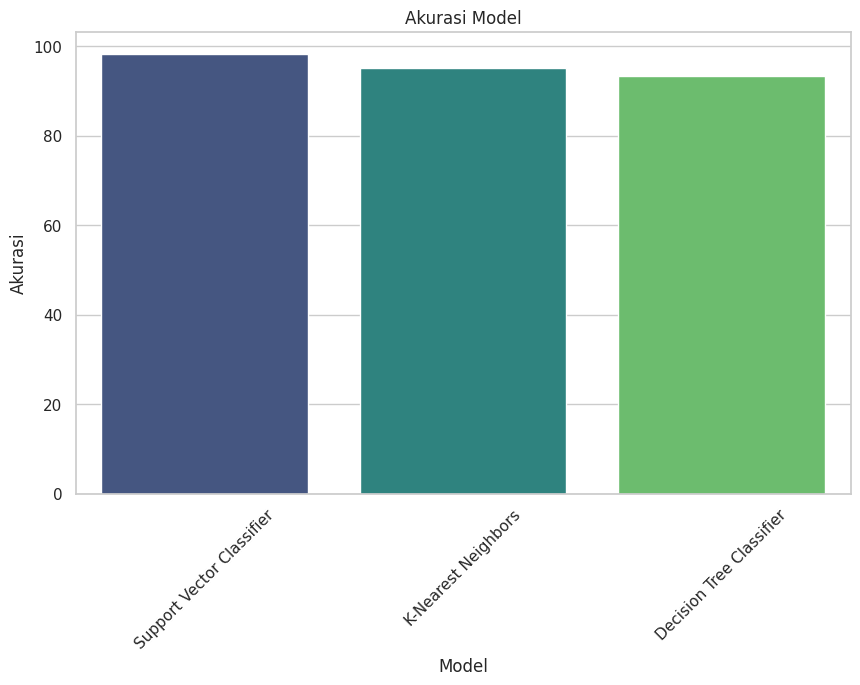

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.title("Akurasi Model")
plt.ylabel("Akurasi")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()

# Langkah 14: Menyimpan Model Terbaik

Setelah model terbaik dipilih, model disimpan menggunakan **joblib** agar dapat digunakan kembali di masa depan tanpa perlu melatih ulang. Hasil dari proses ini memastikan bahwa semua upaya yang telah dilakukan selama pelatihan model tidak hilang, dan memungkinkan integrasi model ke dalam aplikasi atau sistem yang lebih besar.

Selain itu, penyimpanan model juga memudahkan kolaborasi dengan tim lain, di mana model yang sudah terlatih dapat dibagikan dan diterapkan tanpa perlu mengulangi langkah-langkah pelatihan. Dengan demikian, langkah ini merupakan langkah strategis yang penting dalam pengembangan solusi berbasis machine learning yang efisien dan efektif.

In [18]:
import joblib

# Mencari model dengan akurasi tertinggi
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

# Menyimpan model terbaik
joblib.dump(best_model, 'model_terbaik.pkl')
print("Model terbaik telah disimpan!")

Model terbaik telah disimpan!


# Langkah 15: Menguji Model Terbaik
Pada langkah ini, kita akan memuat model terbaik yang telah disimpan dan mengujinya kembali menggunakan data pengujian untuk memastikan bahwa model tersebut bekerja dengan baik setelah disimpan. Pengujian ini dilakukan dengan melakukan prediksi pada data uji yang telah disiapkan, kemudian menampilkan hasil akurasi dan classification report untuk evaluasi performa model.

Hasil dari proses ini menunjukkan apakah model terbaik yang telah disimpan benar-benar dapat diandalkan untuk aplikasi di dunia nyata, serta menegaskan validitas dari semua langkah yang telah diambil sebelumnya dalam pelatihan dan evaluasi model. Jika hasil evaluasi memenuhi kriteria yang diinginkan, maka model dapat diintegrasikan ke dalam sistem yang lebih besar atau digunakan untuk pengambilan keputusan lebih lanjut. Sebaliknya, jika hasil tidak memuaskan, ini dapat mengindikasikan kebutuhan untuk melakukan fine-tuning lebih lanjut atau penyesuaian pada data dan model.

In [19]:
# Memuat model terbaik dari file
best_model_loaded = joblib.load('model_terbaik.pkl')

# Melakukan prediksi menggunakan data uji
y_pred_loaded = best_model_loaded.predict(X_test_scaled)

# Menghitung akurasi model yang di-load
acc_loaded = accuracy_score(y_test, y_pred_loaded)

# Menampilkan akurasi dan laporan klasifikasi
print(f"Accuracy of the loaded model: {acc_loaded:.4f}")
print("Classification Report of the loaded model:")
print(classification_report(y_test, y_pred_loaded))

Accuracy of the loaded model: 0.9836
Classification Report of the loaded model:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        88
           1       1.00      0.94      0.97        34

    accuracy                           0.98       122
   macro avg       0.99      0.97      0.98       122
weighted avg       0.98      0.98      0.98       122



# Langkah 16: Menampilkan Hasil Pengujian
Pada langkah terakhir ini, hasil pengujian dari model yang telah dimuat ditampilkan dengan fokus pada beberapa metrik kinerja yang penting, termasuk akurasi, precision, recall, dan F1-score untuk masing-masing kelas, yaitu Malignant dan Benign.

- **Akurasi** memberikan gambaran umum seberapa baik model dalam mengklasifikasikan data secara keseluruhan. Angka ini menunjukkan persentase prediksi yang benar dibandingkan dengan total prediksi yang dibuat oleh model.
- **Precision** mengukur seberapa banyak dari prediksi positif yang benar-benar positif. Ini penting untuk menilai seberapa banyak hasil positif yang dapat diandalkan ketika model memberikan diagnosis Malignant.
- **Recall** menilai seberapa baik model dalam menemukan semua kasus positif. Dalam konteks kanker, recall yang tinggi sangat diinginkan karena mengindikasikan bahwa model dapat mendeteksi sebanyak mungkin tumor ganas.
- **F1-score** adalah metrik yang menggabungkan precision dan recall menjadi satu angka yang mencerminkan keseimbangan antara keduanya. Ini berguna terutama ketika terdapat ketidakseimbangan kelas, di mana salah satu kelas mungkin lebih dominan.

Selanjutnya, matriks kebingungan (confusion matrix) ditampilkan untuk memberikan gambaran visual tentang distribusi hasil prediksi dibandingkan dengan label yang sebenarnya. Matriks ini menunjukkan jumlah true positives, true negatives, false positives, dan false negatives, memungkinkan kita untuk lebih memahami di mana model melakukan kesalahan. Misalnya, jika model menghasilkan banyak false negatives, ini menunjukkan bahwa ada kasus kanker yang tidak terdeteksi, yang bisa menjadi masalah serius dalam konteks diagnosis medis.

Hasil dari langkah ini memberikan wawasan komprehensif tentang kinerja model dan membantu dalam pengambilan keputusan apakah model sudah cukup baik untuk diimplementasikan atau perlu disempurnakan lebih lanjut. Penilaian yang cermat terhadap metrik ini juga memastikan bahwa model dapat digunakan dengan aman dalam aplikasi nyata, terutama yang berkaitan dengan kesehatan.

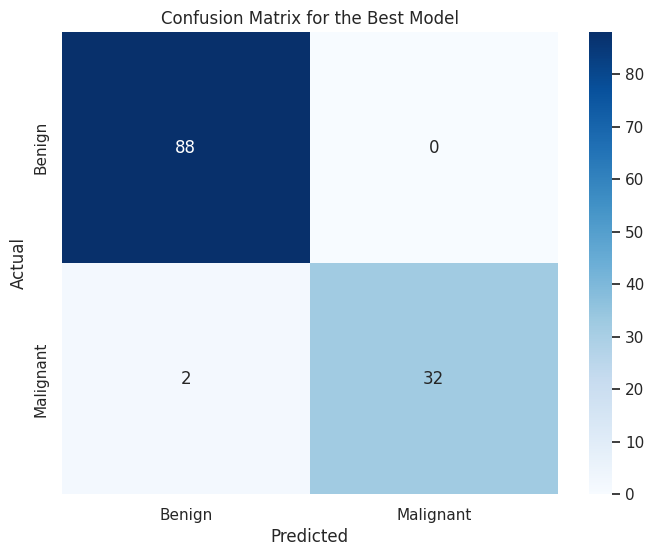

In [20]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_loaded)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the Best Model')
plt.show()